In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from dbds import generate_hotel_dfs
from agg import prep_demand_features
from agg_utils import stly_cols_agg, ly_cols_agg, stly_pace_cols, ty_pace_cols

pd.options.display.max_rows = 150
pd.options.display.max_columns = 250
pd.options.display.max_colwidth = None

h1_res = pd.read_pickle("pickle/h1_res.pick")
h2_res = pd.read_pickle("pickle/h2_res.pick")
h1_dbd = pd.read_pickle("pickle/h1_dbd.pick")
h2_dbd = pd.read_pickle("pickle/h2_dbd.pick")

In [2]:
# Check if simulation files exist
import os
import glob

sim_path = "./sims2/"
h1_sims = glob.glob(f"{sim_path}h1_sim_*.pick")
h2_sims = glob.glob(f"{sim_path}h2_sim_*.pick")

print(f"Found {len(h1_sims)} simulation files for Hotel 1")
print(f"Found {len(h2_sims)} simulation files for Hotel 2")

# Create directory if it doesn't exist
if not os.path.exists(sim_path):
    os.makedirs(sim_path)
    print(f"Created directory {sim_path}")

Found 732 simulation files for Hotel 1
Found 732 simulation files for Hotel 2


In [3]:
DATE_FMT = "%Y-%m-%d"

In [4]:
%%time
try:
    h1_stats = prep_demand_features(1)
    h1_stats.head()
    h1_stats.to_csv("../data/h1_stats.csv")
    h1_stats.to_pickle("../data/h1_stats.pick")
except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Please ensure simulation files exist in the sims2 directory")



Error: [Errno 2] No such file or directory: 'C:\\Users\\Quotus\\Desktop\\rms002\\rms_init\\hotel-revman-system\\code\\sims2h1_sim_2015-08-02.pick'
Please ensure simulation files exist in the sims2 directory
CPU times: total: 438 ms
Wall time: 487 ms


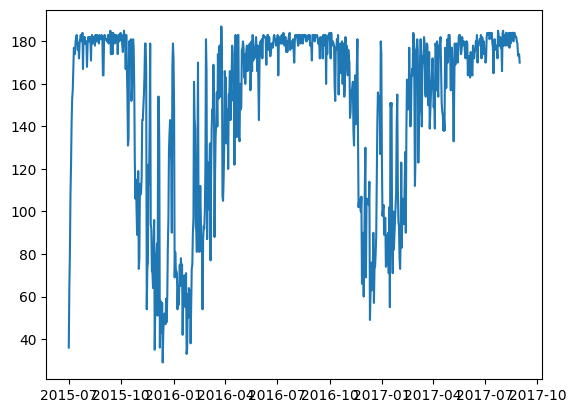

In [5]:
# add hotel stats?
plt.plot(h1_dbd.index, h1_dbd.RoomsSold)
plt.xticklabels=["2015", "2016", "2017"]

In [6]:
%%time
try:
    h2_stats = prep_demand_features(2)
    h2_stats.head()
    h2_stats.to_csv("../data/h2_stats.csv")
    temp=h2_stats.to_pickle("../data/h2_stats.pick")
    print("temp",temp)
except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Please ensure simulation files exist in the sims2 directory")


Error: [Errno 2] No such file or directory: 'C:\\Users\\Quotus\\Desktop\\rms002\\rms_init\\hotel-revman-system\\code\\sims2h2_sim_2015-08-02.pick'
Please ensure simulation files exist in the sims2 directory
CPU times: total: 422 ms
Wall time: 547 ms


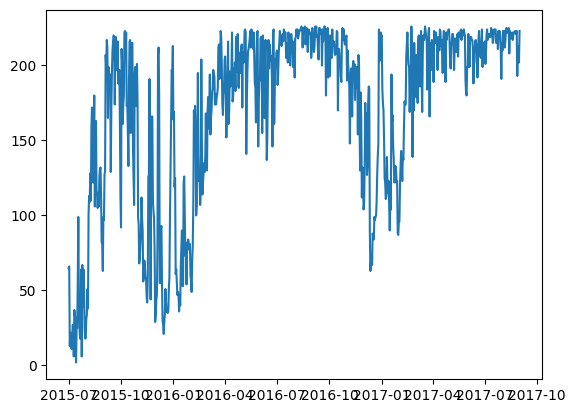

In [7]:
# add hotel stats?
plt.plot(h2_dbd.index, h2_dbd.RoomsSold)
plt.xticklabels=["2015", "2016", "2017"]

In [8]:
# h1_stats.head()

In [9]:
# h1_stats.to_csv("../data/h1_stats.csv")
# h1_stats.to_pickle("../data/h1_stats.pick")
# h2_stats.to_csv("../data/h2_stats.csv")
# h2_stats.to_pickle("../data/h2_stats.pick")

## Plotting

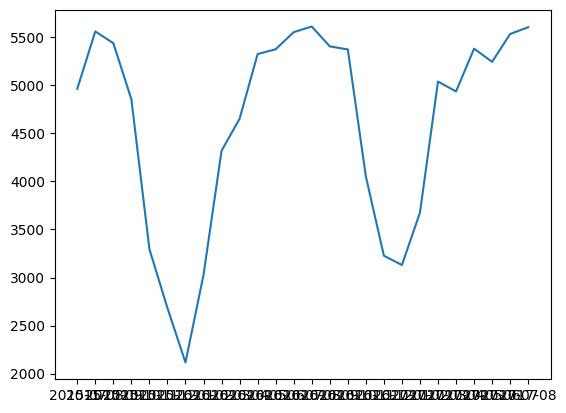

In [10]:
h1_dbd["year"] = pd.Series(h1_dbd.index).dt.year.astype(str)
h1_dbd["month"] = pd.Series(h1_dbd.index).dt.month
year_months = h1_dbd.index.map(lambda x: dt.datetime.strftime(x, format="%Y-%m"))
h1_dbd["year_month"] = year_months
by_month = h1_dbd[['year_month', 'RoomsSold']].groupby("year_month").agg("sum")
plt.xticklabels = [list(h1_dbd.year_month.unique())]
plt.xticklabelrotation = 90

plt.plot(by_month)


In [11]:
h1_res.CustomerType.value_counts()

CustomerType
Transient          30209
Transient-Party     7791
Contract            1776
Group                284
Name: count, dtype: int64

In [12]:
h2_res.CustomerType.value_counts()

CustomerType
Transient          59404
Transient-Party    17333
Contract            2300
Group                293
Name: count, dtype: int64

In [13]:
pd.read_pickle("./sims2/h2_sim_2017-08-01.pick")

,DOW,RoomsOTB,RevOTB,CxlForecast,TRN_RoomsOTB,TRN_RevOTB,TRN_CxlForecast,TRNP_RoomsOTB,TRNP_RevOTB,TRNP_CxlForecast,GRP_RoomsOTB,GRP_RevOTB,GRP_CxlForecast,CNT_RoomsOTB,CNT_RevOTB,CNT_CxlForecast,Date,STLY_Date,DaysUntilArrival,Realized_Cxls,SellingPrice,TM30_RoomsOTB,TM30_RevOTB,TM30_TRN_RoomsOTB,TM30_TRN_RevOTB,TM30_TRNP_RoomsOTB,TM30_TRNP_RevOTB,TM30_GRP_RoomsOTB,TM30_GRP_RevOTB,TM30_CNT_RoomsOTB,TM30_CNT_RevOTB,TM15_RoomsOTB,TM15_RevOTB,TM15_TRN_RoomsOTB,TM15_TRN_RevOTB,TM15_TRNP_RoomsOTB,TM15_TRNP_RevOTB,TM15_GRP_RoomsOTB,TM15_GRP_RevOTB,TM15_CNT_RoomsOTB,TM15_CNT_RevOTB,TM05_RoomsOTB,TM05_RevOTB,TM05_TRN_RoomsOTB,TM05_TRN_RevOTB,TM05_TRNP_RoomsOTB,TM05_TRNP_RevOTB,TM05_GRP_RoomsOTB,TM05_GRP_RevOTB,TM05_CNT_RoomsOTB,TM05_CNT_RevOTB
2017-08-01,Tue,211.0,27892.60,12.0,194.0,25791.40,12.0,15.0,1881.20,0.0,0.0,0.0,0.0,2.0,220.0,0.0,2017-08-01,2016-08-02,0,168,137.65,194.0,25844.51,175.0,23498.31,17.0,2126.20,0.0,0.0,2.0,220.0,204.0,27721.58,187.0,25620.38,15.0,1881.20,0.0,0.0,2.0,220.0,212.0,28333.87,195.0,26232.67,15.0,1881.20,0.0,0.0,2.0,220.0
2017-08-02,Wed,223.0,30750.51,15.0,180.0,24568.85,15.0,41.0,5961.66,0.0,0.0,0.0,0.0,2.0,220.0,0.0,2017-08-02,2016-08-03,1,146,139.66,217.0,29653.15,171.0,23101.49,44.0,6331.66,0.0,0.0,2.0,220.0,218.0,30215.69,174.0,23909.03,42.0,6086.66,0.0,0.0,2.0,220.0,225.0,31070.71,182.0,24889.05,41.0,5961.66,0.0,0.0,2.0,220.0
2017-08-03,Thu,216.0,28856.52,11.0,186.0,24626.26,11.0,28.0,4010.26,0.0,0.0,0.0,0.0,2.0,220.0,0.0,2017-08-03,2016-08-04,2,160,137.19,195.0,25570.26,176.0,23267.10,17.0,2083.16,0.0,0.0,2.0,220.0,198.0,26532.84,178.0,23864.68,18.0,2448.16,0.0,0.0,2.0,220.0,203.0,26934.42,183.0,24266.26,18.0,2448.16,0.0,0.0,2.0,220.0
2017-08-04,Fri,217.0,29164.93,11.0,191.0,25671.27,11.0,26.0,3493.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-08-04,2016-08-05,3,161,138.31,222.0,29682.71,196.0,26364.05,26.0,3318.66,0.0,0.0,0.0,0.0,221.0,29844.73,195.0,26351.07,26.0,3493.66,0.0,0.0,0.0,0.0,215.0,28884.93,189.0,25391.27,26.0,3493.66,0.0,0.0,0.0,0.0
2017-08-05,Sat,205.0,27326.75,8.0,187.0,25143.59,8.0,18.0,2183.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-08-05,2016-08-06,4,151,140.54,221.0,29268.70,201.0,26840.54,20.0,2428.16,0.0,0.0,0.0,0.0,213.0,28544.68,195.0,26361.52,18.0,2183.16,0.0,0.0,0.0,0.0,205.0,27326.75,187.0,25143.59,18.0,2183.16,0.0,0.0,0.0,0.0
2017-08-06,Sun,210.0,27996.48,7.0,189.0,25359.02,7.0,20.0,2457.96,0.0,1.0,179.5,0.0,0.0,0.0,0.0,2017-08-06,2016-08-07,5,127,139.44,221.0,29403.97,198.0,26521.51,22.0,2702.96,1.0,179.5,0.0,0.0,216.0,28947.66,195.0,26310.20,20.0,2457.96,1.0,179.5,0.0,0.0,210.0,27996.48,189.0,25359.02,20.0,2457.96,1.0,179.5,0.0,0.0
2017-08-07,Mon,209.0,28832.16,10.0,187.0,26138.60,10.0,21.0,2514.06,0.0,1.0,179.5,0.0,0.0,0.0,0.0,2017-08-07,2016-08-08,6,128,143.74,214.0,28855.07,190.0,25916.51,23.0,2759.06,1.0,179.5,0.0,0.0,213.0,29313.35,191.0,26619.79,21.0,2514.06,1.0,179.5,0.0,0.0,212.0,29255.59,190.0,26562.03,21.0,2514.06,1.0,179.5,0.0,0.0
2017-08-08,Tue,214.0,29622.19,15.0,193.0,27088.13,15.0,21.0,2534.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-08-08,2016-08-09,7,145,140.53,213.0,28864.92,189.0,25997.36,24.0,2867.56,0.0,0.0,0.0,0.0,216.0,30040.20,194.0,27417.64,22.0,2622.56,0.0,0.0,0.0,0.0,219.0,30223.62,197.0,27600.56,21.0,2534.06,1.0,89.0,0.0,0.0
2017-08-09,Wed,207.0,28497.37,17.0,170.0,24230.74,17.0,37.0,4266.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-08-09,2016-08-10,8,136,146.36,206.0,27757.67,164.0,22951.86,42.0,4805.81,0.0,0.0,0.0,0.0,210.0,28970.63,168.0,24164.82,42.0,4805.81,0.0,0.0,0.0,0.0,215.0,29769.80,177.0,25414.17,37.0,4266.63,1.0,89.0,0.0,0.0
2017-08-10,Thu,213.0,28870.34,21.0,173.0,24133.91,21.0,40.0,4736.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-08-10,2016-08-11,9,139,143.98,215.0,28422.92,170.0,23147.31,45.0,5275.61,0.0,0.0,0.0,0.0,223.0,30329.50,178.0,25053.89,45.0,5275.61,0.0,0.0,0.0,0.0,218.0,30060.03,177.0,25234.60,40.0,4736.43,1.0,89.0,0.0,0.0


In [14]:
# Helper function to save simulation data
def save_sample_sim(hotel_num, date_str):
    """Save a sample simulation file for testing"""
    import pandas as pd
    import numpy as np
    
    # Create sample data
    df = pd.DataFrame({
        'date': pd.date_range(date_str, periods=30),
        'RoomsOTB': np.random.randint(50, 150, 30),
        'ADR_OTB': np.random.uniform(80, 200, 30)
    })
    
    # Save to pickle file
    filename = f"./sims2/h{hotel_num}_sim_{date_str}.pick"
    df.to_pickle(filename)
    print(f"Saved sample simulation to {filename}")